<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Hometasks/Base/AI_HW1_Regression_with_inference_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (base)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

**Максимальная оценка за дз**
> Оценка за домашку = $min(\text{ваш балл}, 11)$

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

**Задание 0 (0 баллов).**
Для чего фиксируем сиды в домашках?

`Чтобы результаты были воспроизводимыми`

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [181]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.55 балла)**

Выполните операции, направленные на практику основных действий с `pandas`:
- [ ] Отобразите 10 случайных строк тренировочного датасета (0.15 балла)
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета (0.1 балла)
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)


**Бонус**
- [ ] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)

In [182]:
# Сразу удаляем колонку torque (она нам не понадобится)

target_column = 'selling_price'

Y_train = df_train[target_column]
Y_test = df_test[target_column]

df_train = df_train.drop(columns=['torque'], axis=1, errors='ignore')
df_test = df_test.drop(columns=['torque'], axis=1, errors='ignore')

In [183]:
df_train.sample(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,5.0


In [184]:
df_test.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,5.0


In [185]:
df_test.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,5.0


In [186]:
train_isna = df_train.isna().sum()
train_isna = train_isna[train_isna > 0]
train_isna

mileage      202
engine       202
max_power    196
seats        202
dtype: int64

In [187]:
test_isna = df_test.isna().sum()
test_isna = test_isna[test_isna > 0]
test_isna

mileage      19
engine       19
max_power    19
seats        19
dtype: int64

In [188]:
df_train.duplicated().sum()

np.int64(985)

Мы обнаружили пропуски. Давайте избавимся от них.

- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

In [189]:
# Исправляем строковые колонки перед тем, как заполнить пропуски (как написано в задании 3)

def remove_units(df, columns):
    df_res = df.copy()

    for col in columns:
        if df_res[col].dtype == 'object':
            df_res[col] = df_res[col].str.split(' ').str.get(0)

        df_res[col] = df_res[col].apply(
            lambda x: float(x) if type(x) == str and len(x) > 0 else x if type(x) == float else np.nan)

    return df_res


df_train = remove_units(df_train, ['mileage', 'engine', 'max_power'])
df_test = remove_units(df_test, ['mileage', 'engine', 'max_power'])

df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6994,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
6995,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,5.0
6996,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.90,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70.00,5.0


In [190]:
train_medium = df_train[train_isna.index].median()

df_train = df_train.fillna(train_medium)
df_test = df_test.fillna(train_medium)

print("train isna", df_train.isna().sum().sum())
print("test isna", df_test.isna().sum().sum())

train isna 0
test isna 0


### **Задание 2 (0.5 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [191]:
columns_subset = df_train.columns.drop(target_column)
columns_subset

Index(['name', 'year', 'km_driven', 'fuel', 'seller_type', 'transmission',
       'owner', 'mileage', 'engine', 'max_power', 'seats'],
      dtype='object')

In [192]:
print("train duplicates", df_train.duplicated(subset=columns_subset).sum())

train duplicates 1159


In [193]:
df_train[df_train.duplicated(subset=columns_subset)].sort_values(by=['name'])

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
6307,Audi Q3 2.0 TDI Quattro Premium Plus,2017,2825000,22000,Diesel,Dealer,Automatic,First Owner,15.73,1968.0,174.33,5.0
6704,Audi Q5 3.0 TDI Quattro,2014,1850000,76131,Diesel,Individual,Automatic,First Owner,13.22,2967.0,241.40,5.0
6640,Audi Q5 35TDI Premium Plus,2018,3975000,31800,Diesel,Dealer,Automatic,First Owner,17.01,1968.0,188.00,5.0
1595,Audi Q5 35TDI Premium Plus,2018,3975000,31800,Diesel,Dealer,Automatic,First Owner,17.01,1968.0,188.00,5.0
2787,Audi Q5 35TDI Premium Plus,2018,3975000,31800,Diesel,Dealer,Automatic,First Owner,17.01,1968.0,188.00,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6778,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.00,1969.0,190.00,5.0
3623,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.00,1969.0,190.00,5.0
2293,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.00,1969.0,190.00,5.0
5652,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.00,1969.0,190.00,5.0


In [194]:
df_train = df_train.drop_duplicates(subset=columns_subset, keep='first', ignore_index=True)

df_train.shape

(5840, 12)

In [195]:
# assert df_train.shape == (5840, 13)
assert df_train.shape == (5840, 12)  # без колонки torque

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [196]:
df_train.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine           float64
max_power        float64
seats            float64
dtype: object

In [197]:
df_test.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine           float64
max_power        float64
seats            float64
dtype: object

### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

In [198]:
df_train['engine'] = df_train['engine'].astype(int)
df_test['engine'] = df_test['engine'].astype(int)

df_train['seats'] = df_train['seats'].astype(int)
df_test['seats'] = df_test['seats'].astype(int)

In [199]:
df_train.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine             int64
max_power        float64
seats              int64
dtype: object

In [200]:
df_test.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine             int64
max_power        float64
seats              int64
dtype: object

### **Задание 5 (0.1 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

Числовые характеристики

In [201]:
df_train.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,5840.000000,5.840000e+03,5.840000e+03,5840.000000,5840.000000,5840.000000,5840.000000
mean,2013.428425,5.229601e+05,7.395224e+04,19.428611,1429.448973,87.910782,5.426712
std,4.095622,5.354320e+05,6.007114e+04,3.986026,485.662834,31.639585,0.982344
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,0.000000,2.000000
25%,2011.000000,2.500000e+05,3.900000e+04,16.950000,1197.000000,68.000000,5.000000
50%,2014.000000,4.050000e+05,7.000000e+04,19.300000,1248.000000,81.860000,5.000000
75%,2017.000000,6.400000e+05,1.000000e+05,22.300000,1498.000000,99.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000


In [202]:
df_test.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,2013.681000,6.179010e+05,71393.341000,19.337480,1454.87600,90.844330,5.403000
std,4.012149,7.585539e+05,48486.218662,3.951751,521.99574,34.892709,0.912921
min,1995.000000,3.100000e+04,1303.000000,0.000000,624.00000,34.200000,4.000000
25%,2011.000000,2.500000e+05,37000.000000,16.550000,1197.00000,69.000000,5.000000
50%,2014.000000,4.349990e+05,61500.000000,19.300000,1248.00000,82.425000,5.000000
75%,2017.000000,6.700000e+05,100000.000000,22.300000,1582.00000,102.000000,5.000000
max,2020.000000,6.000000e+06,375000.000000,32.260000,3604.00000,280.000000,9.000000


Категориальные характеристики

In [203]:
df_train.describe(include='object')

,name,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840,5840
unique,1924,4,3,2,5
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner
freq,91,3177,5223,5336,3603


In [204]:
df_test.describe(include='object')

,name,fuel,seller_type,transmission,owner
count,1000,1000,1000,1000,1000
unique,621,4,3,2,5
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner
freq,15,534,837,877,623


In [205]:
# assert df_train.shape == (5840, 13)
assert df_train.shape == (5840, 12)  # без колонки torque

## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

In [206]:
numeric_columns = df_train.select_dtypes(include=[float, int]).columns
numeric_columns

Index(['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power',
       'seats'],
      dtype='object')

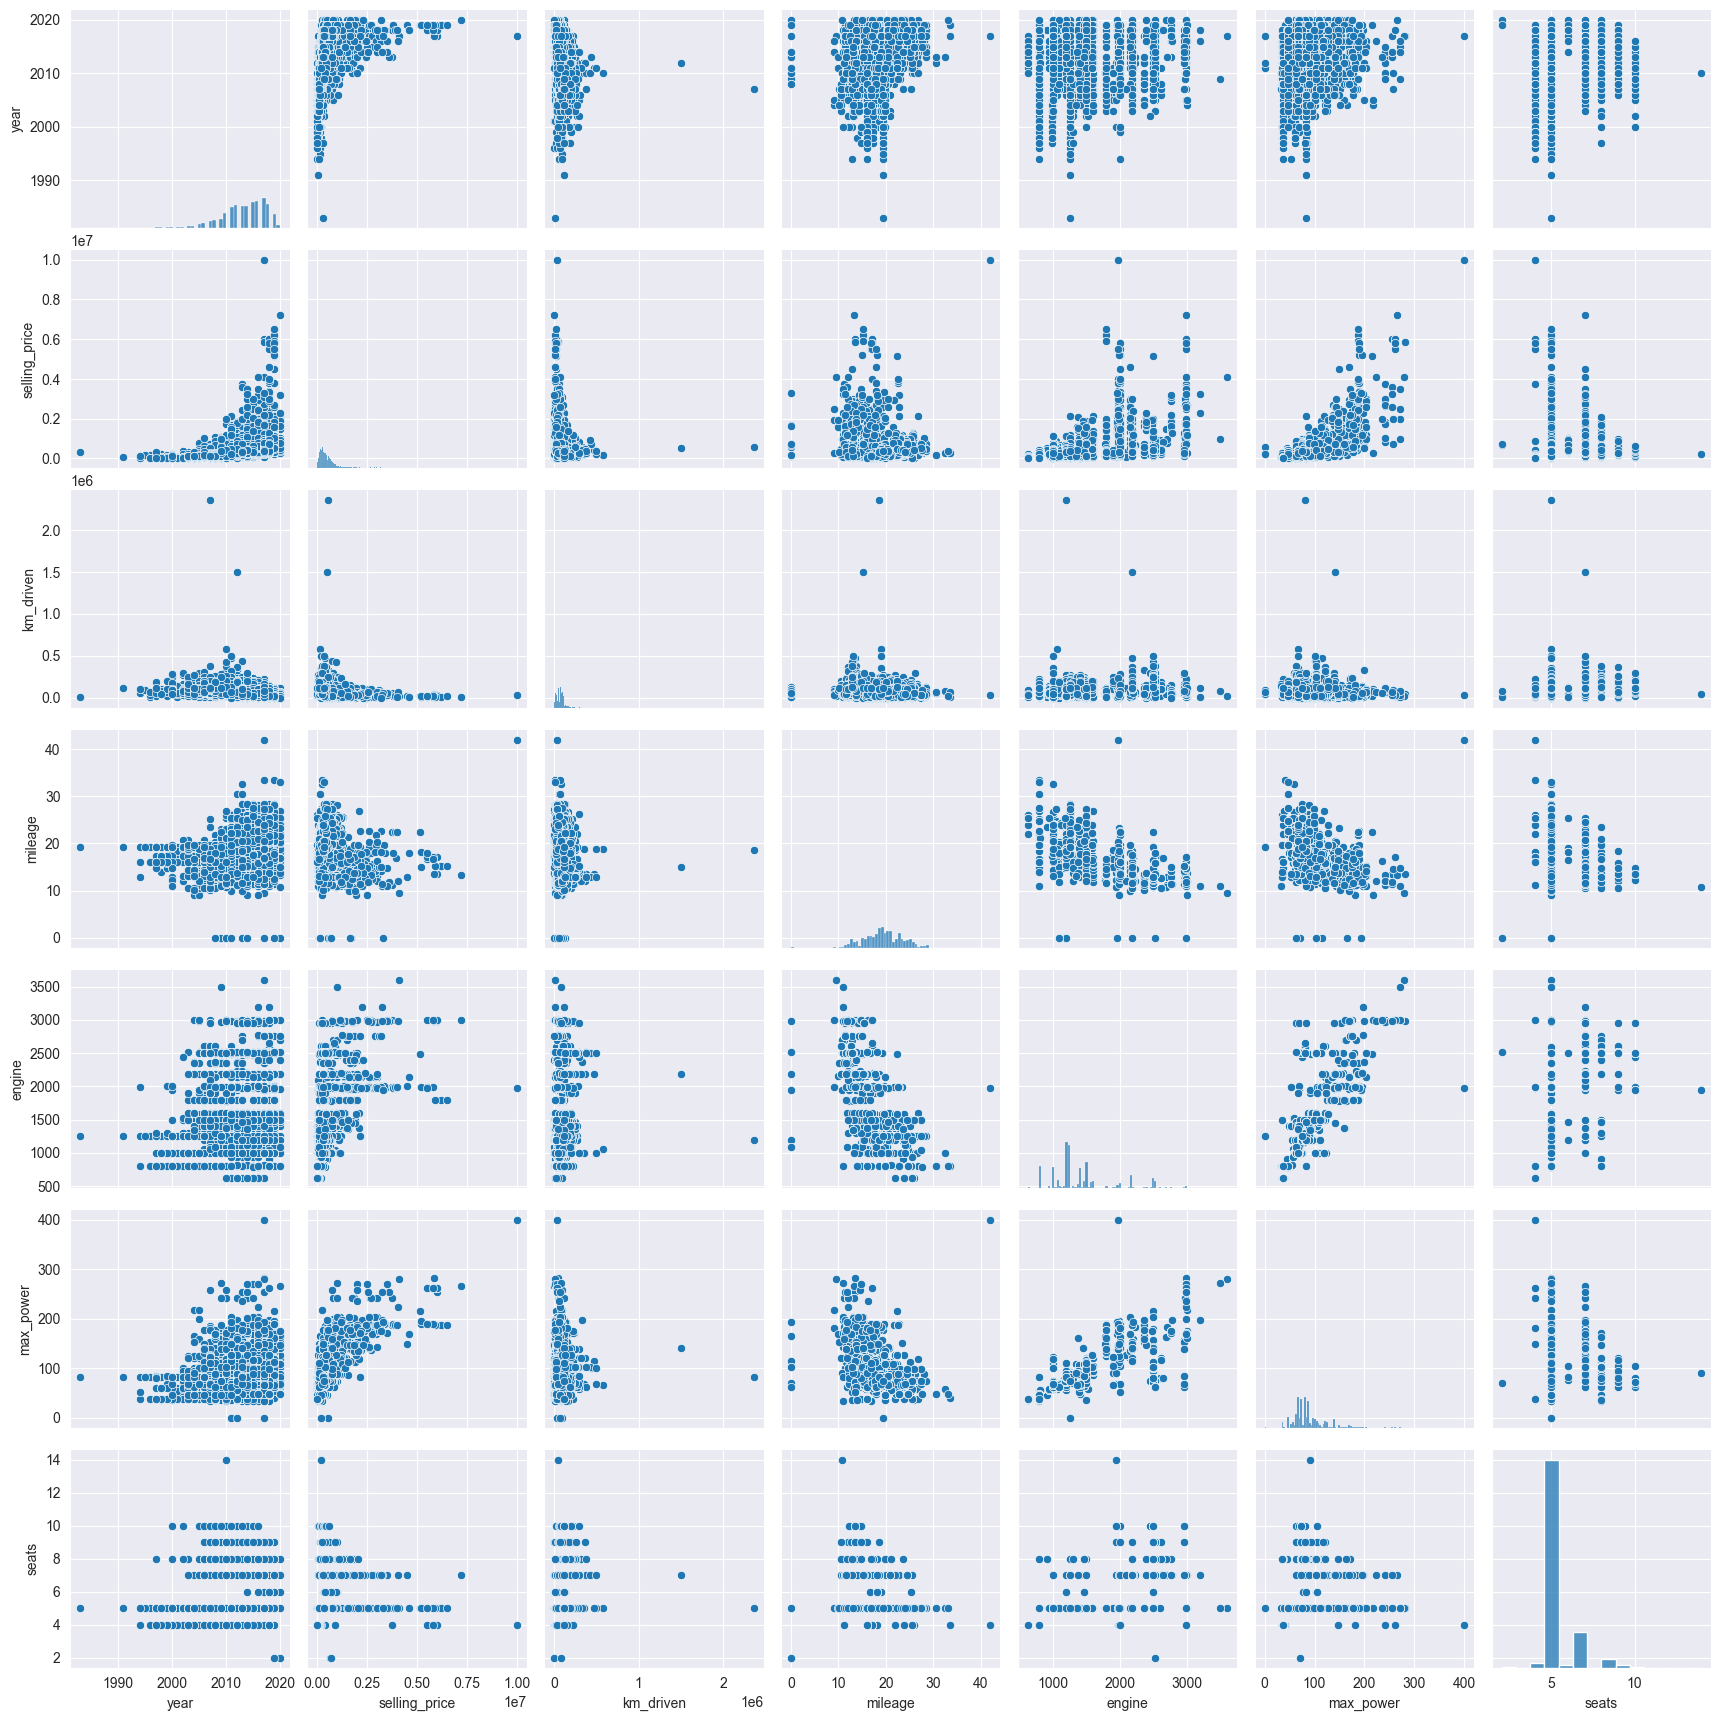

In [207]:
sns.pairplot(df_train[numeric_columns])

#### Можно ли предположить на основе распределений связь признаков с целевой переменной?
selling_price имеет линейную зависимость с max_power и engine. Также можно предположить, что mileage имеют обратную зависимость с selling_price.


#### Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?
Можно предположить, что max_power и engine имеют сильную положительную корреляцию.

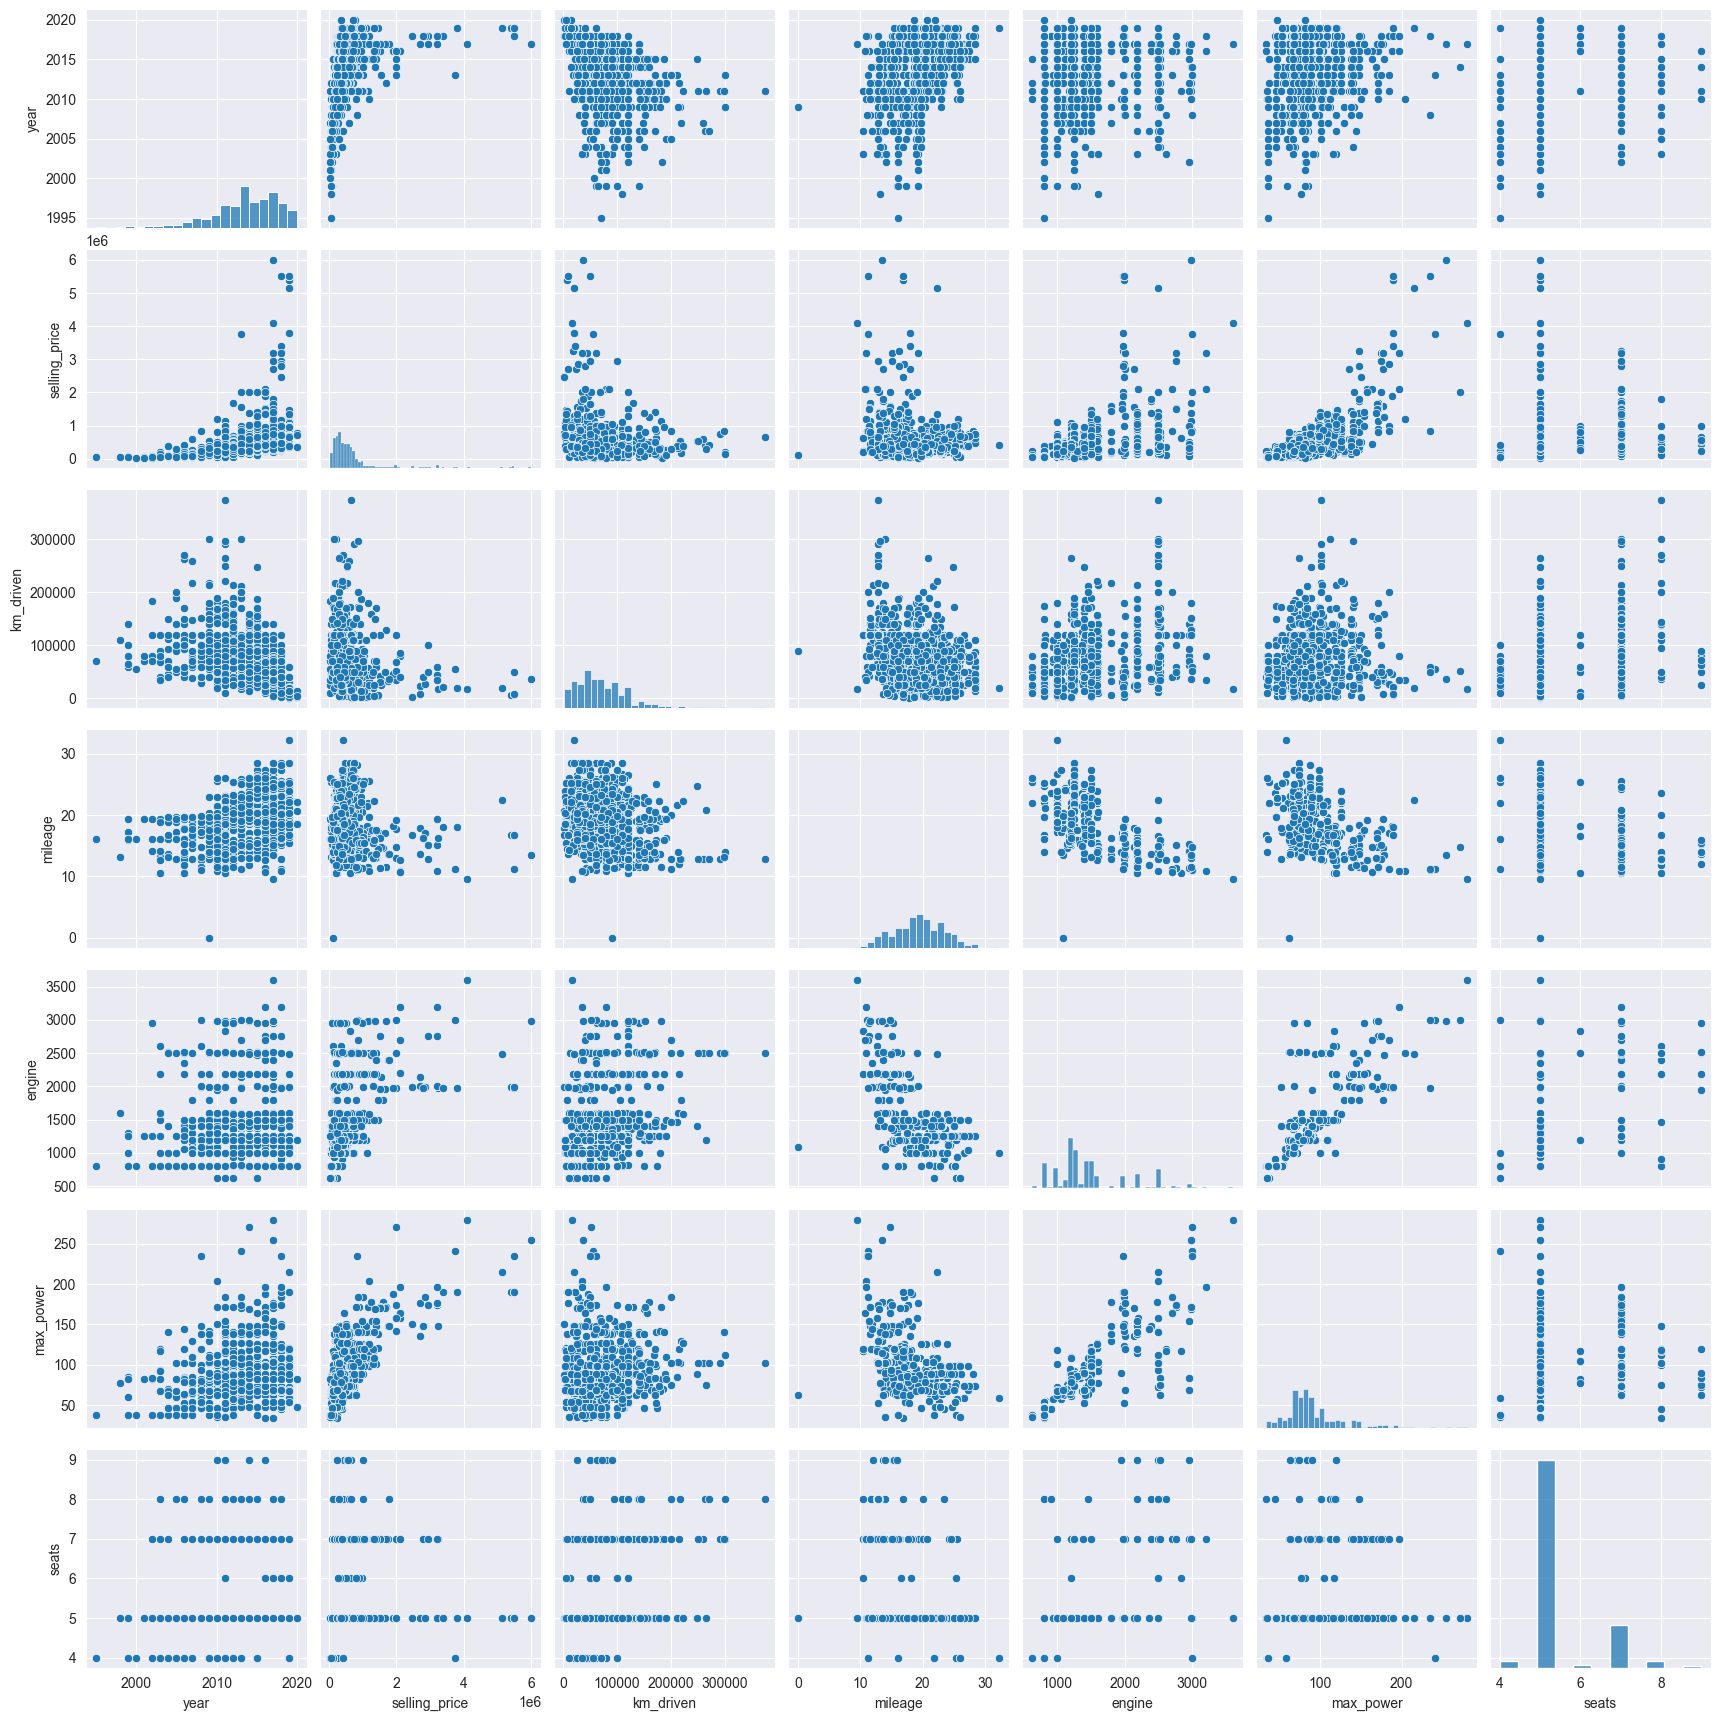

In [208]:
sns.pairplot(df_test[numeric_columns])

#### Похожими ли оказались совокупности при разделении на трейн и тест?

Совокупности оказались похожими (в частности корреляция между selling_price и engine/max_power), но в трейне больше выбросов.

### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


In [209]:
correlation = df_train[numeric_columns].corr()
correlation

,year,selling_price,km_driven,mileage,engine,max_power,seats
year,1.000000,0.427279,-0.368966,0.342172,0.002819,0.156648,0.041178
selling_price,0.427279,1.000000,-0.164828,-0.104458,0.447672,0.692754,0.149953
km_driven,-0.368966,-0.164828,1.000000,-0.182245,0.229766,0.024630,0.192328
mileage,0.342172,-0.104458,-0.182245,1.000000,-0.572677,-0.373271,-0.450810
engine,0.002819,0.447672,0.229766,-0.572677,1.000000,0.681082,0.652172
max_power,0.156648,0.692754,0.024630,-0.373271,0.681082,1.000000,0.244060
seats,0.041178,0.149953,0.192328,-0.450810,0.652172,0.244060,1.000000


<Axes: >

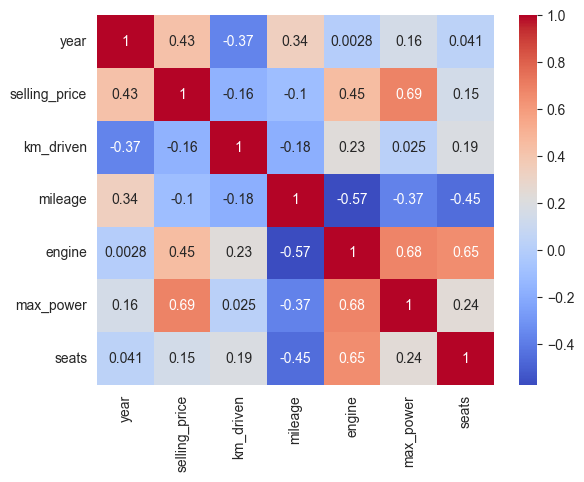

In [210]:
sns.heatmap(correlation, annot=True, cmap='coolwarm')

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

#### Какие 2 признака наименее скоррелированы между собой?
year и engine

#### Между какими наблюдается довольно сильная положительная линейная зависимость?
max_power и selling_price

#### Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?
В целом, можно, эти признаки коррелируют с коэффициентом корреляции -0.37 (чем меньше год, тем больше километров проехала машина к дате продажи).

### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

In [211]:
# your code here

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [212]:
y_train = df_train[target_column]
X_train = df_train[numeric_columns].drop(columns=[target_column])

In [213]:
assert X_train.shape == (5840, 6)

In [214]:
y_test = df_test[target_column]
X_test = df_test[numeric_columns].drop(columns=[target_column])

X_test

,year,km_driven,mileage,engine,max_power,seats
0,2010,168000,14.00,2498,112.00,7
1,2017,25000,21.50,1497,108.50,5
2,2007,218463,12.90,1799,130.00,5
3,2015,173000,25.10,1498,98.60,5
4,2011,70000,16.50,1172,65.00,5
...,...,...,...,...,...,...
995,2008,100000,19.81,1086,68.05,5
996,2017,50000,18.60,1197,81.83,5
997,2009,40000,23.00,1396,90.00,5
998,2012,25000,20.36,1197,78.90,5


In [215]:
assert X_test.shape == (1000, 6)

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [216]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE


def print_metrics(label, y_true, y_pred):
    print(f"{label}: R^2={r2_score(y_true, y_pred)}, MSE={MSE(y_true, y_pred)}")


def do_regression(model, X_train, X_test, y_train):
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    print_metrics("Train", y_train, y_train_pred)
    print_metrics("Test", y_test, y_test_pred)

    return model


model = do_regression(LinearRegression(), X_train, X_test, y_train)

Train: R^2=0.5922629595849868, MSE=116873067751.52184
Test: R^2=0.5941441219017103, MSE=233297548204.61243


#### Выводы
Модель имеет высокую ошибку и довольно низкий R^2 (~0.59). Это говорит о том, что модель плохо обучена и не может объяснить большую часть дисперсии.

### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [217]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled

array([[ 0.13956959,  1.19115249,  0.99641312, -0.37364298, -0.4397015 ,
        -0.43441899],
       [ 0.13956959,  0.76661943,  0.42938385,  0.14116151,  0.49338685,
        -0.43441899],
       [-0.83716668,  0.88315792,  0.89605396, -0.06887872,  0.06603744,
        -0.43441899],
       ...,
       [-0.10461448,  0.60013588, -0.23298663, -0.4786631 , -0.15996465,
        -0.43441899],
       [-1.56971888,  0.74997108, -0.65951308,  0.13086542,  0.69821112,
        -0.43441899],
       [-1.08135075,  0.76661943, -0.03226831, -0.37364298, -0.44286237,
        -0.43441899]])

In [218]:
scaled_model = do_regression(LinearRegression(), X_train_scaled, X_test_scaled, y_train)

Train: R^2=0.5922629595849875, MSE=116873067751.52162
Test: R^2=0.5941441219017267, MSE=233297548204.603


### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [219]:
print("columns", X_train.columns)
print("coeffs", scaled_model.coef_)

columns Index(['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats'], dtype='object')
coeffs [152843.26235773 -44148.04751104  28781.08659475  61176.85714999
 322779.70323584 -23220.5702262 ]


#### Какой признак оказался наиболее информативным в предсказании цены?
Наиболее информативным признаком оказался max_power.

### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [220]:
from sklearn.linear_model import Lasso

lasso_model = do_regression(Lasso(), X_train_scaled, X_test_scaled, y_train)

Train: R^2=0.5922629595497046, MSE=116873067761.63504
Test: R^2=0.5941429546560312, MSE=233298219170.76022


Качество модели сильно не изменилось

In [221]:
print("coeffs", lasso_model.coef_)

coeffs [152843.08385345 -44146.91853785  28779.20408499  61172.02578008
 322780.58619708 -23217.69327311]


#### Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.
Нет, не занулила. Это, вероятно, произошло из-за того, что нормализованные признаки не имеют большого разброса и L1-регуляризация не смогла найти незначимые признаки.

### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [222]:
from sklearn.model_selection import GridSearchCV

lasso = Lasso()
params = {
    'alpha': np.logspace(1, 10, 3000)
}

grid_lasso = GridSearchCV(lasso, params, cv=10)
grid_lasso.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': array([1.00000000e+01, 1.00693399e+01, 1.01391606e+01, ...,
       9.86274942e+09, 9.93113761e+09, 1.00000000e+10])})

In [223]:
print("grid models", len(grid_lasso.cv_results_['params']))
print("best params", grid_lasso.best_params_)
print("columns", X_train.columns)
print("coeffs", grid_lasso.best_estimator_.coef_)

grid models 3000
best params {'alpha': np.float64(26554.69884382)}
columns Index(['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats'], dtype='object')
coeffs [145964.54114252 -15763.66046718      0.              0.
 321859.54259236     -0.        ]


In [224]:
grid_lasso_model = do_regression(Lasso(alpha=grid_lasso.best_params_['alpha']), X_train_scaled, X_test_scaled, y_train)

Train: R^2=0.5826122034733707, MSE=119639344447.25267
Test: R^2=0.5645711245337431, MSE=250296951567.5405


#### Сколько грид-сёрчу пришлось обучать моделей?
3000

#### Какой коэффициент регуляризации у лучшей из перебранных моделей?
Коэффициент регуляризации: 26554.69884382

#### Занулились ли какие-нибудь из весов при такой регуляризации?
Да, занулились веса признаков mileage, engine и seats.

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [225]:
from sklearn.linear_model import ElasticNet

elastic = ElasticNet()

params = {
    'alpha': np.logspace(1, 5, 100),
    'l1_ratio': np.linspace(0.01, 1, 100)
}

grid_elastic = GridSearchCV(elastic, params, cv=10)
grid_elastic.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': array([1.00000000e+01, 1.09749877e+01, 1.20450354e+01, 1.32194115e+01,
       1.45082878e+01, 1.59228279e+01, 1.74752840e+01, 1.91791026e+01,
       2.10490414e+01, 2.31012970e+01, 2.53536449e+01, 2.78255940e+01,
       3.05385551e+01, 3.35160265e+01, 3.67837977e+01, 4.03701726e+01,
       4.43062146e+01, 4.86260158e+01, 5.33669923e...
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])})

In [226]:
print("grid models", len(grid_elastic.cv_results_['params']))
print("best params", grid_elastic.best_params_)
print("columns", X_train.columns)
print("coeffs", grid_elastic.best_estimator_.coef_)

grid models 10000
best params {'alpha': np.float64(14.508287784959395), 'l1_ratio': np.float64(0.99)}
columns Index(['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats'], dtype='object')
coeffs [142691.29551972 -46181.06053387  20562.29921209  82198.48889116
 268097.73133346 -23113.01912377]


In [227]:
grid_elastic_model = do_regression(
    ElasticNet(alpha=grid_elastic.best_params_['alpha'], l1_ratio=grid_elastic.best_params_['l1_ratio']),
    X_train_scaled, X_test_scaled, y_train)

Train: R^2=0.5849423124948081, MSE=118971445869.15514
Test: R^2=0.5625497567920588, MSE=251458891466.90707


#### Сколько грид-сёрчу пришлось обучать моделей?
10000

#### Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?
alpha=14.508287784959395, l1_ratio=0.99

# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


### **Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец`name`

In [228]:
categorical_columns = df_train.select_dtypes(include='object').columns.drop('name')
categorical_columns

Index(['fuel', 'seller_type', 'transmission', 'owner'], dtype='object')

In [229]:
X_train_cat = df_train[list(categorical_columns)]
X_test_cat = df_test[list(categorical_columns)]

X_train_cat.head(10)

,fuel,seller_type,transmission,owner
0,Diesel,Individual,Manual,First Owner
1,Diesel,Individual,Manual,Second Owner
2,Diesel,Individual,Manual,First Owner
3,Petrol,Individual,Manual,First Owner
4,Petrol,Individual,Manual,First Owner
5,LPG,Individual,Manual,First Owner
6,Petrol,Individual,Manual,Second Owner
7,Diesel,Individual,Manual,First Owner
8,Diesel,Individual,Manual,First Owner
9,Diesel,Individual,Manual,Second Owner


In [230]:
# append scaled columns
X_train_cat = pd.concat([X_train_cat, pd.DataFrame(X_train_scaled, columns=X_train.columns)], axis=1)
X_test_cat = pd.concat([X_test_cat, pd.DataFrame(X_test_scaled, columns=X_test.columns)], axis=1)

X_train_cat.head(10)

,fuel,seller_type,transmission,owner,year,km_driven,mileage,engine,max_power,seats
0,Diesel,Individual,Manual,First Owner,0.139570,1.191152,0.996413,-0.373643,-0.439701,-0.434419
1,Diesel,Individual,Manual,Second Owner,0.139570,0.766619,0.429384,0.141162,0.493387,-0.434419
2,Diesel,Individual,Manual,First Owner,-0.837167,0.883158,0.896054,-0.068879,0.066037,-0.434419
3,Petrol,Individual,Manual,First Owner,-1.569719,0.766619,-0.835142,-0.270682,0.009142,-0.434419
4,Petrol,Individual,Manual,First Owner,0.872122,-0.482007,0.178486,-0.478663,-0.191257,-0.434419
5,LPG,Individual,Manual,First Owner,-1.569719,1.682279,-0.534064,-0.758717,-0.961245,-0.434419
6,Petrol,Individual,Manual,Second Owner,-3.034823,-1.147941,-0.835142,-1.304409,-1.609223,-1.452480
7,Diesel,Individual,Manual,First Owner,-0.592983,0.267169,1.044084,-0.134774,-0.657801,-0.434419
8,Diesel,Individual,Manual,First Owner,-0.104614,1.582389,0.143360,-0.062701,-0.626193,-0.434419
9,Diesel,Individual,Manual,Second Owner,0.139570,-0.099095,-0.105029,0.064970,0.649218,-0.434419


В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

### **Бонус 0.5 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

In [231]:
# assert X_train_cat.shape == (5840, 10)

In [232]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


### **Задание 15 (0.4 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [233]:
from sklearn.preprocessing import OneHotEncoder


def fit_one_hot_encoder(df, columns, encoder):
    data_to_encode = df[columns]

    encoded_array = encoder.fit_transform(data_to_encode)
    encoded_columns = encoder.get_feature_names_out(columns)

    encoded_df = pd.DataFrame(encoded_array, columns=encoded_columns, index=df.index)

    df = df.drop(columns, axis=1)
    df = pd.concat([df, encoded_df], axis=1)

    return df


def transform_one_hot_encoder(df, columns, encoder):
    data_to_encode = df[columns]

    encoded_array = encoder.transform(data_to_encode)
    encoded_columns = encoder.get_feature_names_out(columns)

    encoded_df = pd.DataFrame(encoded_array, columns=encoded_columns, index=df.index)

    df = df.drop(columns, axis=1)
    df = pd.concat([df, encoded_df], axis=1)

    return df


one_hot_encoder = OneHotEncoder(drop='first', sparse_output=False)

X_train_cat_encoded = fit_one_hot_encoder(X_train_cat, categorical_columns, one_hot_encoder)
X_test_cat_encoded = transform_one_hot_encoder(X_test_cat, categorical_columns, one_hot_encoder)

X_train_cat_encoded.head(10)

,year,km_driven,mileage,engine,max_power,seats,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,0.139570,1.191152,0.996413,-0.373643,-0.439701,-0.434419,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.139570,0.766619,0.429384,0.141162,0.493387,-0.434419,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,-0.837167,0.883158,0.896054,-0.068879,0.066037,-0.434419,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,-1.569719,0.766619,-0.835142,-0.270682,0.009142,-0.434419,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.872122,-0.482007,0.178486,-0.478663,-0.191257,-0.434419,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
5,-1.569719,1.682279,-0.534064,-0.758717,-0.961245,-0.434419,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
6,-3.034823,-1.147941,-0.835142,-1.304409,-1.609223,-1.452480,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
7,-0.592983,0.267169,1.044084,-0.134774,-0.657801,-0.434419,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
8,-0.104614,1.582389,0.143360,-0.062701,-0.626193,-0.434419,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
9,0.139570,-0.099095,-0.105029,0.064970,0.649218,-0.434419,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [234]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
params = {
    'alpha': np.logspace(1, 10, 3000)
}

grid_ridge = GridSearchCV(ridge, params, cv=10, scoring='r2')
grid_ridge.fit(X_train_cat_encoded, y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e+01, 1.00693399e+01, 1.01391606e+01, ...,
       9.86274942e+09, 9.93113761e+09, 1.00000000e+10])},
             scoring='r2')

In [235]:
print("grid models", len(grid_ridge.cv_results_['params']))
print("best params", grid_ridge.best_params_)
print("columns", X_train_cat_encoded.columns)
print("coeffs", grid_ridge.best_estimator_.coef_)

grid models 3000
best params {'alpha': np.float64(116.23987074608715)}
columns Index(['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats',
       'fuel_Diesel', 'fuel_LPG', 'fuel_Petrol', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'transmission_Manual',
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner'],
      dtype='object')
coeffs [ 135728.34723448  -37642.3744118    20995.06232251   49226.11590644
  276206.51078757  -14414.46859113   16343.39351904   25091.02906319
  -37753.10061137 -104521.10310681  -23011.68677624 -247875.76049617
  -24311.23260553  -54149.35796695  110639.86065215  -37584.29579497]


In [236]:
grid_ridge_model = do_regression(Ridge(alpha=grid_ridge.best_params_['alpha']), X_train_cat_encoded, X_test_cat_encoded,
                                 y_train)

Train: R^2=0.6235218174505834, MSE=107913080673.96185
Test: R^2=0.6320402726753941, MSE=211513758591.11905


#### Удалось ли улучшить качество прогнозов?
Да, R^2 увеличился с 0.59 до 0.63, MSE уменьшился.

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [237]:
def business_metric(y_true, y_pred):
    return np.sum(np.abs(y_true - y_pred) / y_true <= 0.1) / len(y_true)


def print_business_metric(label, y_true, y_pred):
    print(f"{label}: business metric = {business_metric(y_true, y_pred)}")


def do_regression_business(model, X_train, X_test, y_train, label):
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    print_business_metric(f"{label}: test", y_test, y_test_pred)

    return model


business_linear_model = do_regression_business(LinearRegression(),
                                               X_train_scaled,
                                               X_test_scaled,
                                               y_train,
                                               "LinearRegression")

business_lasso_model = do_regression_business(Lasso(alpha=grid_lasso.best_params_['alpha']),
                                              X_train_scaled,
                                              X_test_scaled,
                                              y_train,
                                              "Lasso")

business_elastic_model = do_regression_business(
    ElasticNet(alpha=grid_elastic.best_params_['alpha'], l1_ratio=grid_elastic.best_params_['l1_ratio']),
    X_train_scaled,
    X_test_scaled,
    y_train,
    "ElasticNet")

business_ridge_model = do_regression_business(Ridge(alpha=grid_ridge.best_params_['alpha']),
                                              X_train_cat_encoded,
                                              X_test_cat_encoded,
                                              y_train,
                                              "Ridge(with categorical features)")

LinearRegression: test: business metric = 0.227
Lasso: test: business metric = 0.233
ElasticNet: test: business metric = 0.244
Ridge(with categorical features): test: business metric = 0.224


#### Какая модель лучше всего решает задачу бизнеса?
Лучше всего справилась ElasticNet модель без категориальных фич.

In [240]:
import pickle

with open('model.pkl', 'wb') as file:
    pickle.dump(grid_ridge_model, file)

with open('one_hot_encoder.pkl', 'wb') as file:
    pickle.dump(one_hot_encoder, file)

with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

# **Часть 5 (3 балла) | Реализация сервиса на FastAPI**

### **Задание 18 (3 балла)**


Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [239]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 19 (1 балл)**


**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* сохраненный дашборд в любом формате
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией
3. Просматривает ноутбук с DS-частью
4. Заглядывает в код сервиса
5. Хвалит

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой!

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/XbnpCTg)

</details>

